# Mean-Shift Clustering

## Objectives

- Explore Mean-Shift clustering to determine the number of clusters based on data density automatically.
- Evaluate the impact of the bandwidth parameter on clustering results' granularity.
- Demonstrate the application of Mean-Shift in different contexts, including image segmentation.

## Background

Mean-Shift clustering is a non-parametric technique that locates the most dense areas of a dataset to form clusters by iteratively shifting data points towards peaks of density. It is beneficial for applications where the number of clusters is unknown a priori.

## Datasets Used

- Synthetic datasets with predefined centers to validate the accuracy of Mean-Shift in identifying cluster centers.
- High-dimensional image data for segmenting color photos, illustrating the algorithm's utility in practical image processing tasks.

## A Simple Example

Mean-shift clustering is a non-parametric technique that iteratively shifts data points toward the densest area in a dataset to automatically form clusters without pre-specifying the number of clusters.

In [1]:
import numpy as np
import pandas as pd

import ClusterVisualizer as cv
from PIL import Image
import matplotlib.pyplot as plt
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook_connected"

In [2]:
from sklearn.datasets import make_blobs

centers1 = [(1,1), (3,3), (5,1)]
X1, _ = make_blobs(n_samples = 300, centers = centers1, cluster_std = 0.5, random_state=0)

In [3]:
# Save the data to a DataFrame
df_X1 = pd.DataFrame(X1, columns=['x', 'y'])
df_X1.head()

,x,y
0,1.475044,0.924321
1,3.977956,3.195047
2,2.823284,2.191763
3,0.772234,1.008740
4,1.232831,0.231878


In [4]:
cv_X1 = cv.ClusterVisualizer(df_X1)

cv_X1.plot_data()

In [5]:
# Apply Mean Shift algorithm
from sklearn.cluster import MeanShift

mean_shift1 = MeanShift().fit(X1)

In [6]:
# Extracting the cluster centers
cluster_centers1 = mean_shift1.cluster_centers_
cluster_centers1.round(0)

array([[3., 3.],
       [1., 1.],
       [5., 1.]])

In [7]:
# Looking at the centers used for generating the data
centers1

[(1, 1), (3, 3), (5, 1)]

As you can see, the center values estimated by the algorithm are approximately the same as those used for generating our original data.

In [8]:
# Extracting labels 
labels1 = mean_shift1.labels_

In [9]:
cv_X1.plot_clusters(labels1, cluster_centers1, title='Mean Shift Clustering')

### The `bandwidth` parameter

The bandwidth in Mean-Shift clustering is a critical parameter that controls the algorithm's scale of observation, influencing the resulting clusters' granularity.

In [10]:
# Specify the bandwidth value
bandwidth = 1

# Apply Mean Shift algorithm with specified bandwidth
mean_shift = MeanShift(bandwidth=bandwidth).fit(X1)

In [11]:
cv_X1.plot_clusters(mean_shift.labels_, mean_shift.cluster_centers_, 
                    title='Mean Shift Clustering (bandwidth = 1)')

The default value for the `bandwidth` value is 1. That is why we got exactly the same results.

A smaller bandwidth will consider a smaller group of points, leading to the identification of more and smaller groups.

In [12]:
# Decreasing the bandwidth
# Apply Mean Shift algorithm with specified bandwidth
mean_shift2 = MeanShift(bandwidth=0.55).fit(X1)

cv_X1.plot_clusters(mean_shift2.labels_, mean_shift2.cluster_centers_,
                    title='Mean Shift Clustering (bandwidth = 0.55)')

A larger bandwidth will encompass more points, potentially merging nearby clusters into larger ones.

In [13]:
# Increasing the bandwidth 
mean_shift3 = MeanShift(bandwidth=2).fit(X1)

cv_X1.plot_clusters(mean_shift3.labels_, mean_shift3.cluster_centers_,
                    title='Mean Shift Clustering (bandwidth = 2)')

## Four-Center Blob Clustering Example

In [14]:
# Generate sample data
n_samples2 = 400
X2 = make_blobs(n_samples=n_samples2, centers=4, cluster_std=0.5, random_state=0)[0]

# Save the data to a DataFrame
df_X2 = pd.DataFrame(X2, columns=['x', 'y'])

In [15]:
cv_X2 = cv.ClusterVisualizer(df_X2)

cv_X2.plot_data(title='Data - Example 2')

In [16]:
mean_shift4 = MeanShift().fit(X2)

cv_X2.plot_clusters(mean_shift4.labels_, mean_shift4.cluster_centers_,
                    title='Mean Shift Clustering (bandwidth = 1)')

In [17]:
# Decreasing the bandwidth
mean_shift5 = MeanShift(bandwidth=0.6).fit(X2)

cv_X2.plot_clusters(mean_shift5.labels_, mean_shift5.cluster_centers_,
                    title='Mean Shift Clustering (bandwidth = 0.6)')

In [18]:
# Increasing the bandwidth
mean_shift6 = MeanShift(bandwidth=2.5).fit(X2)

cv_X2.plot_clusters(mean_shift6.labels_, mean_shift6.cluster_centers_,
                    title='Mean Shift Clustering (bandwidth = 2.5)')

The bandwidth parameter can be found automatically.

In [19]:
# For detecting the bandwidth parameter automatically
from sklearn.cluster import estimate_bandwidth

The `estimate_bandwidth` option estimates an appropriate bandwidth for the Mean Shift clustering algorithm. 

- `quantile`: It represents the proportion of the nearest neighbor distances used to calculate the bandwidth. 
- `n_samples`: It dictates how many data points from the dataset are randomly sampled to estimate the bandwidth. 

In [20]:
bandwidth2 = estimate_bandwidth(X2, quantile=0.1, n_samples=n_samples2)
np.round(bandwidth2, 2)

0.74

In [21]:
mean_shift7 = MeanShift(bandwidth=bandwidth2).fit(X2)

cv_X2.plot_clusters(mean_shift7.labels_, mean_shift7.cluster_centers_,
                    title='Mean Shift Clustering (bandwidth = %s)' % bandwidth2.round(2))

In [22]:
# Changing the parameters
bandwidth3 = estimate_bandwidth(X2, quantile=0.3, n_samples=100)

mean_shift8 = MeanShift(bandwidth=bandwidth3).fit(X2)

cv_X2.plot_clusters(mean_shift8.labels_, mean_shift8.cluster_centers_,
                    title='Mean Shift Clustering (bandwidth = %s)' % bandwidth3.round(2))

## Segmentazing Color Photos

Color image segmentation is a process of partitioning an image into multiple segments, where each segment represents a group of pixels with similar attributes (like color). Mean Shift, a clustering technique, can group pixels based on color similarity, effectively segmenting the image.

### Toy Story: Woody

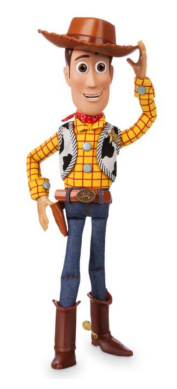

In [23]:
# Woody (Toy Story)
image_w = Image.open('toy.jpg')
image_w = np.array(image_w)
plt.imshow(image_w)
plt.axis('off');

We need to convert the image data into a format suitable for clustering. Typically, this involves reshaping the image data into a 2D array, where each row represents a pixel, and each column represents color channels (e.g., RGB).

In [24]:
print('Original image shape: ', image_w.shape)
flat_image_w=np.reshape(image_w, [-1, 3])
print('Flattened image shape:', flat_image_w.shape)

Original image shape:  (696, 297, 3)
Flattened image shape: (206712, 3)


In [25]:
# Estimate bandwidth
bandwidth_w = estimate_bandwidth(flat_image_w,quantile=.2, n_samples=500)
print('Estimated bandwidth = %.2f' % bandwidth_w)

Estimated bandwidth = 42.57


In [26]:
# Run Mean Shift algorithm
mean_shift_w = MeanShift(bandwidth=bandwidth_w, bin_seeding=True).fit(flat_image_w)

Here, we are using an optimization technique. When `bin_seeding` is `True`, the initial seeds for the clustering are placed at the locations of a discretized version of the dataset rather than at every data point. It leads to significant improvements in computational efficiency, especially for large datasets. 


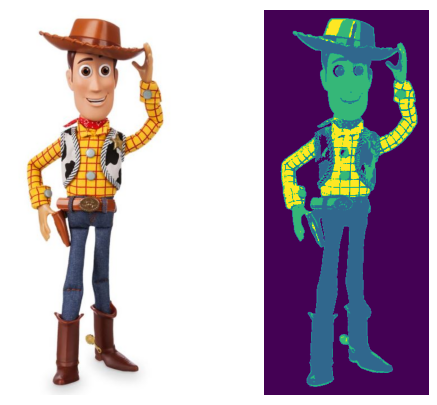

In [27]:
# Plot image vs segmented image
plt.figure(figsize=(6,5))

plt.subplot(121)
plt.imshow(image_w)
plt.axis('off')

plt.subplot(122)
plt.imshow(np.reshape(mean_shift_w.labels_, [image_w.shape[0],image_w.shape[1]]))
plt.axis('off');

In the segmented image, you can observe that the colors have been reduced, and areas have been homogenized. The Mean Shift algorithm has clustered pixels of similar colors, creating segments that represent different parts of the character. For instance, the hat, face, shirt, badge, belt, jeans, and boots are distinguished by different colors, although with less detail than in the original image.

### Lake Tahoe

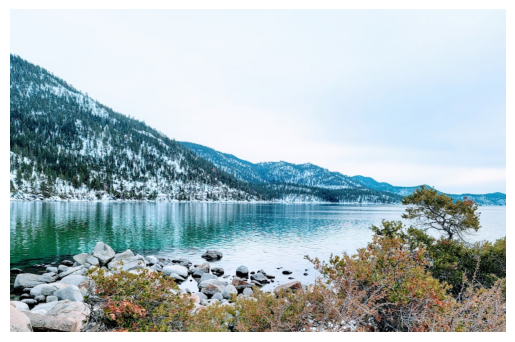

In [28]:
# Lake Tahoe
lake = Image.open('Lake_Tahoe.png')
image_l = np.array(lake)
plt.imshow(image_l)
plt.axis('off');

In [29]:
print('Original image shape: ', image_l.shape)

Original image shape:  (596, 916, 4)


The dimensions `(596, 916, 4)` of an image array represent the image's height, width, and number of color channels, respectively. The "4" in these dimensions indicates the image has four channels: red, green, blue, and an additional alpha channel. The alpha channel represents transparency information, where each value corresponds to the pixel's opacity (0 being fully transparent and 255 being fully opaque for 8-bit images).

Let's remove the alpha channel.

In [30]:
image_l = image_l[:,:,:3]
print('Original image shape: ', image_l.shape)
flat_image_l=np.reshape(image_l, [-1, 3])
print('Flattened image shape:', flat_image_l.shape)

Original image shape:  (596, 916, 3)
Flattened image shape: (545936, 3)


In [31]:
# Estimate bandwidth
bandwidth_l = estimate_bandwidth(flat_image_l,quantile=.2, n_samples=500)
print('Estimated bandwidth = %.2f' % bandwidth_l)

Estimated bandwidth = 51.25


In [32]:
# Run Mean Shift algorithm
mean_shift_l = MeanShift(bandwidth=bandwidth_l, bin_seeding=True).fit(flat_image_l)

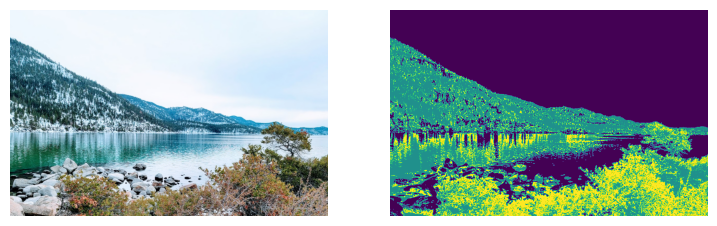

In [33]:
# Plot image vs segmented image
plt.figure(figsize=(9,6))

plt.subplot(121)
plt.imshow(image_l)
plt.axis('off')

plt.subplot(122)
plt.imshow(np.reshape(mean_shift_l.labels_, [image_l.shape[0],image_l.shape[1]]))
plt.axis('off');

The image on the right displays the outcome of the segmentation process. This image has been reduced to a limited number of colors, each representing a cluster of pixels from the original image that share similar color properties. 

The segmentation algorithm has grouped pixels into a few distinct colors, simplifying the complex color patterns of the original scene. 

It is a more abstract representation where details are lost. However, more prominent features like the lake, the shore, and the vegetation are still distinguishable.

## Conclusions

Key Takeaways:
- Mean-Shift effectively identifies true cluster centers in synthetic data, as demonstrated by its ability to approximate the predefined centers used to generate the samples.
- The bandwidth parameter crucially influences the clustering behavior, with smaller values detecting more, finer clusters and larger values potentially merging distinct clusters.
- In image segmentation, Mean-Shift simplifies the color space, reducing color variability within regions while maintaining the separation between different color-based segments, which can be beneficial for image compression or object recognition tasks.

## References

- https://scikit-learn.org/stable/modules/clustering.html#mean-shift